In [96]:
# Установка компонентов
!pip install plotly


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# 1 задание
Проанализировать данные с кафе

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
data=pd.read_csv('tips.csv')

# Выводим первые 5 записей набора данных
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Рассмотрим на основе набора данных из ресторана о оставленных чаевых
Имеются следующие признаки:
* Общий счет (Total bill)
* Чаевые (Tips)
* Пол (Sex)
* Курящий (Smoker)
* День недели (Day)
* Время (Time)
* Количество (Size)


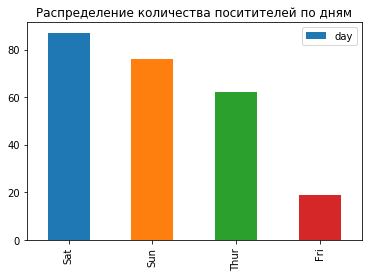

In [3]:
data['day'].value_counts().plot(kind='bar', label='day')
plt.legend()
plt.title('Распределение количества поситителей по дням'); 

# Гистограмма чаевых в ресторане

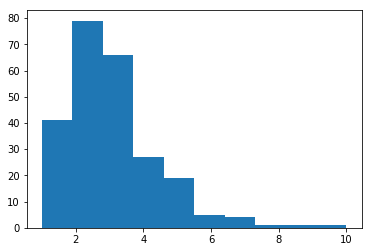

In [4]:
plt.hist(data['tip'])
plt.show()

# Проанализируем оставленное количество чаевых у мужчин и женщин

In [5]:
F=data[data['sex']=='Female']['tip'].max()
M=data[data['sex']=='Male']['tip'].max()
print(F, '- максимальное количество чаевых у женщин')
print(M, '- максимальное количество чаевых у мужчин')

6.5 - максимальное количество чаевых у женщин
10.0 - максимальное количество чаевых у мужчин


# Посмотрим на то, как связаны между собой чаевые и общий счет

C:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


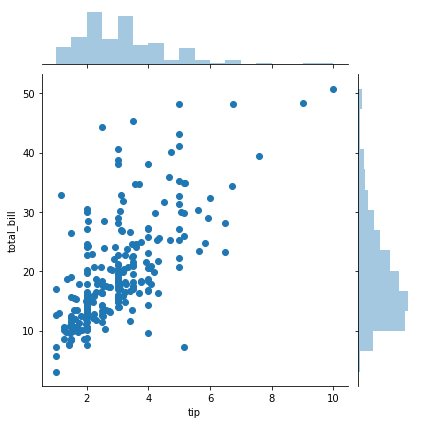

In [6]:
sns.jointplot(data.tip, data.total_bill)

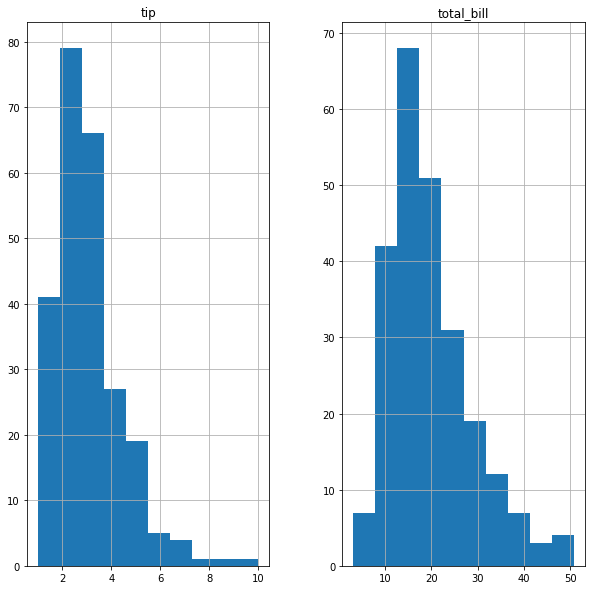

In [7]:
#распределения количественных признаков
features = list(set(data.columns)-set(['sex', 'smoker', 'day', 'time', 'size']))
data[features].hist(figsize=(10,10));

# Исследуя данные о курящих, делаем вывод что мужчин курящих почти в два раза больше

In [8]:
df=data[data['smoker']=='Yes']  
wom=df[df['sex']=='Female'].shape[0]
men=df[df['sex']=='Male'].shape[0]
print('Курящие девушки:', wom)
print('Курящие мужчины:', men)

Курящие девушки: 33
Курящие мужчины: 60


In [11]:
df2=data[data['smoker']=='No']  
wom=df2[df2['sex']=='Female'].shape[0]
men=df2[df2['sex']=='Male'].shape[0]
print('Не курящие девушки:', wom)
print('Не курящие мужчины:', men)

Не курящие девушки: 54
Не курящие мужчины: 97


In [14]:
wom=data[data['sex']=='Female'].shape[0]  
man=data[data['sex']=='Male'].shape[0]
print('Всего пришло девушек в кафе:', wom)
print('Всего пришло мужчин в кафе:', man)
data.shape[0]

Всего пришло девушек в кафе: 87
Всего пришло мужчин в кафе: 157


244

## Задние 2
Загрузите файл premier_league.csv. Данный набор данных включает в себя результаты 4560 матчей Премьер-лиги по 380 матчей в каждом из 12 сезонов с 2006/2007 по 2017/2018. Выполните следующие задачи:
+ Опишите имеющиеся признаки;
+ Постройте не менее 8 различных видов графиков;
+ Проанализируйте и опишите набор данных.



In [24]:
data=pd.read_csv('premier_league.csv')

# Выводим первые 5 записей набора данных
data.head()

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007


Имеются следующие признаки:
* Домашняя команда (home_team)
* Команда гостей (away_team)
* Домашние голы (home_goals)
* Голы гостей (away_goals)
* результат (result) 
* сезон (season)



# Сколько домашних игр сыграли первые 5 команд

In [22]:
print('Количество сыгравших домашних игр команды Sheffield United:', data[data['home_team']=='Sheffield United'].shape[0])
print('Количество сыгравших домашних игр команды Arsenal:', data[data['home_team']=='Arsenal'].shape[0])
print('Количество сыгравших домашних игр команды Everton:',data[data['home_team']=='Everton'].shape[0])
print('Количество сыгравших домашних игр команды Newcastle United:',data[data['home_team']=='Newcastle United'].shape[0])
print('Количество сыгравших домашних игр команды Portsmouth:',data[data['home_team']=='Portsmouth'].shape[0])

Количество сыгравших домашних игр команды Sheffield United: 19
Количество сыгравших домашних игр команды Arsenal: 228
Количество сыгравших домашних игр команды Everton: 228
Количество сыгравших домашних игр команды Newcastle United: 190
Количество сыгравших домашних игр команды Portsmouth: 76


# Команды, которые забили по 3 домашних гола

In [25]:
three_goals = data[data['home_goals'].isin(['3.0'])]

pd.crosstab(three_goals['home_goals'], three_goals['home_team'], margins=True)

home_team,AFC Bournemouth,Arsenal,Aston Villa,Birmingham City,Blackburn Rovers,Blackpool,Bolton Wanderers,Brighton and Hove Albion,Burnley,Cardiff City,...,Stoke City,Sunderland,Swansea City,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United,Wigan Athletic,Wolverhampton Wanderers,All
home_goals,,,,,,,,,,,,,,,,,,,,,
3.0,6,45,14,3,16,1,12,2,3,3,...,20,16,18,27,7,20,29,10,4,573
All,6,45,14,3,16,1,12,2,3,3,...,20,16,18,27,7,20,29,10,4,573


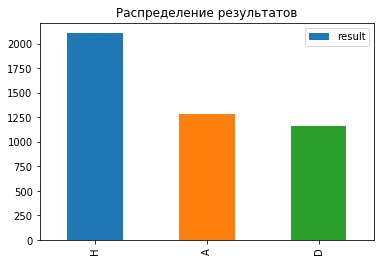

In [29]:
data['result'].value_counts().plot(kind='bar', label='result')
plt.legend()
plt.title('Распределение результатов');

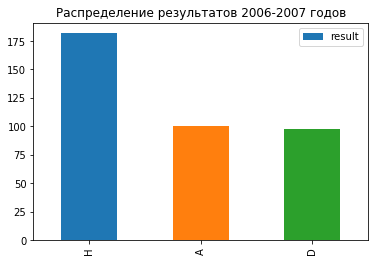

In [34]:
df=data[data['season']=='2006-2007']
df['result'].value_counts().plot(kind='bar', label='result')
plt.legend()
plt.title('Распределение результатов 2006-2007 годов');

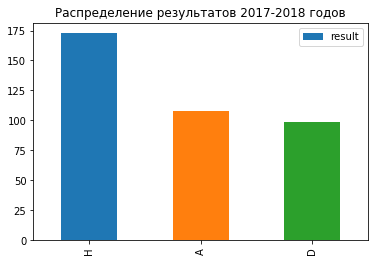

In [35]:
df2=data[data['season']=='2017-2018']
df2['result'].value_counts().plot(kind='bar', label='result')
plt.legend()
plt.title('Распределение результатов 2017-2018 годов');

# Арсенал - имеет больше побед, чем поражений

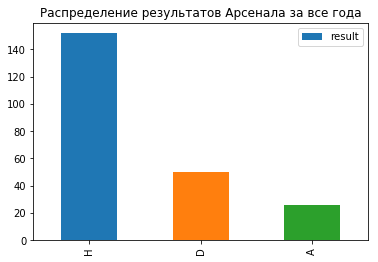

In [38]:
Arsenal = data[data['home_team']=='Arsenal']
Arsenal = Arsenal['result'].value_counts().plot(kind='bar', label='result')
plt.legend()
plt.title('Распределение результатов Арсенала за все года');

# Гистограмма общего голов гостевой команды
Можно сделать вывод что гостевые команды чаще не забивают больше двух голов

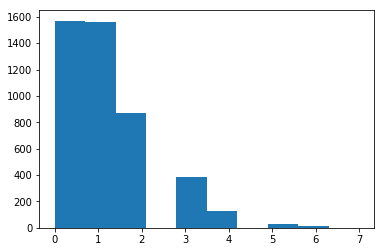

In [40]:
plt.hist(data['away_goals'])
plt.show()

C:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


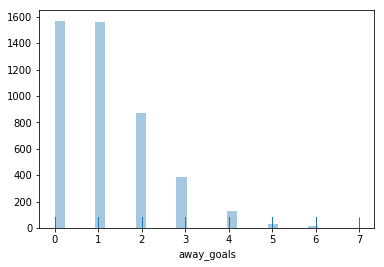

In [42]:
# Изменим свойства hist
sns.distplot(data['away_goals'], kde=False, rug=True)
plt.show()

# Таким образом получим более наглядую гистограмму

# Строим boxplot для результата  и гостевых голов

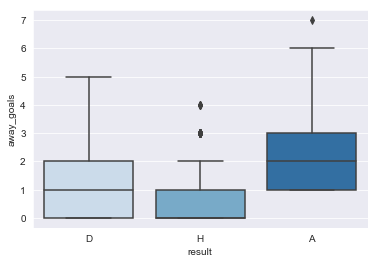

In [45]:

sns.set_style('darkgrid')
sns.boxplot(x='result', y='away_goals', data=data, palette='Blues')
plt.show()

# Строим boxplot для сезона  и гостевых голов

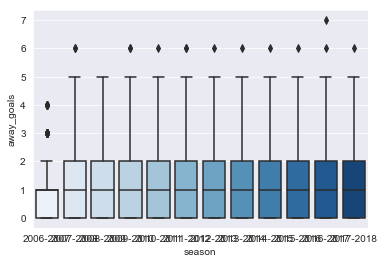

In [48]:
sns.set_style('darkgrid')
sns.boxplot(x='season', y='away_goals', data=data, palette='Blues')
plt.show()

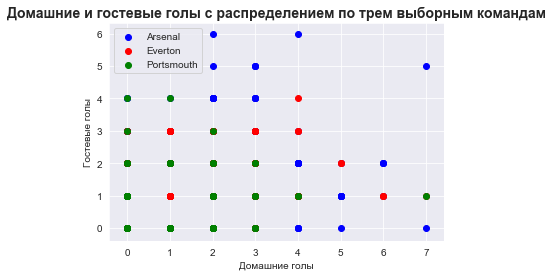

In [50]:
fig, ax= plt.subplots()
ax.scatter(data[data['home_team']=='Arsenal']['home_goals'], data[data['away_team']=='Arsenal']['away_goals'], color='blue', label='Arsenal')
ax.scatter(data[data['home_team']=='Everton']['home_goals'], data[data['away_team']=='Everton']['away_goals'], color='red', label='Everton')
ax.scatter(data[data['home_team']=='Portsmouth']['home_goals'], data[data['away_team']=='Portsmouth']['away_goals'], color='green', label='Portsmouth')
ax.set_title('Домашние и гостевые голы с распределением по трем выборным командам', fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel('Гостевые голы')
ax.set_xlabel('Домашние голы')
ax.legend()
plt.show()
